In [1]:
from datetime import datetime

In [2]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [5]:
my_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [6]:
my_date

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [7]:
my_date.day

2

In [8]:
my_date.year

2017

In [9]:
import numpy as np

In [10]:
np.array(['2016-03-15','2017-05-24','2018-08-09'], dtype='datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [11]:
np.array(['2016-03-15','2017-05-24','2018-08-09'], dtype='datetime64[h]')

array(['2016-03-15T00', '2017-05-24T00', '2018-08-09T00'],
      dtype='datetime64[h]')

In [12]:
np.array(['2016-03-15','2017-05-24','2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

In [13]:
np.arange('2018-06-01','2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [15]:
np.arange('1968','1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [16]:
import pandas as pd

In [25]:
idx = pd.date_range('7/8/2018', periods=7, freq='D')

In [24]:
idx

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [26]:
idx

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

In [27]:
idx = pd.to_datetime(['Jan 01, 2018', '1/2/18','03-Jan-2018',None])

In [28]:
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
some_dates = np.array(['2016-03-15','2017-05-24','2018-08-09'], dtype='datetime64[D]')

In [30]:
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [31]:
idx = pd.to_datetime(some_dates)

In [32]:
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [33]:
pd.DatetimeIndex(some_dates)

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [ ]:
df.set_index('Date', inplace=True)

In [34]:
#Pandas Date TIme Analysis

In [35]:
data = np.random.randn(3,2)

In [36]:
data

array([[ 0.04803658, -0.25295703],
       [ 0.75394233,  1.75134583],
       [-1.63413818, -0.03654687]])

In [37]:
cols = ['A','B']

In [38]:
df = pd.DataFrame(data, idx, cols)

In [39]:
df

,A,B
2016-03-15,0.048037,-0.252957
2017-05-24,0.753942,1.751346
2018-08-09,-1.634138,-0.036547


In [40]:
df.index

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [41]:
df.index.max()

Timestamp('2018-08-09 00:00:00')

In [42]:
df.index.argmax()

2

In [43]:
df.index.argmin()

0

In [50]:
df = pd.read_csv('starbucks.csv',index_col='Date', parse_dates=True )

In [51]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [ ]:
#resample()

In [53]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [58]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [59]:
def first_day(entry): 
    """
    Returns the first instance of the period regardless of the sampling date"""
    if len(entry): 
        return entry[0]

In [60]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [62]:
%matplotlib inline

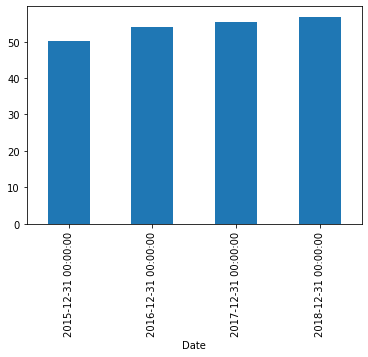

In [63]:
df['Close'].resample('A').mean().plot.bar()

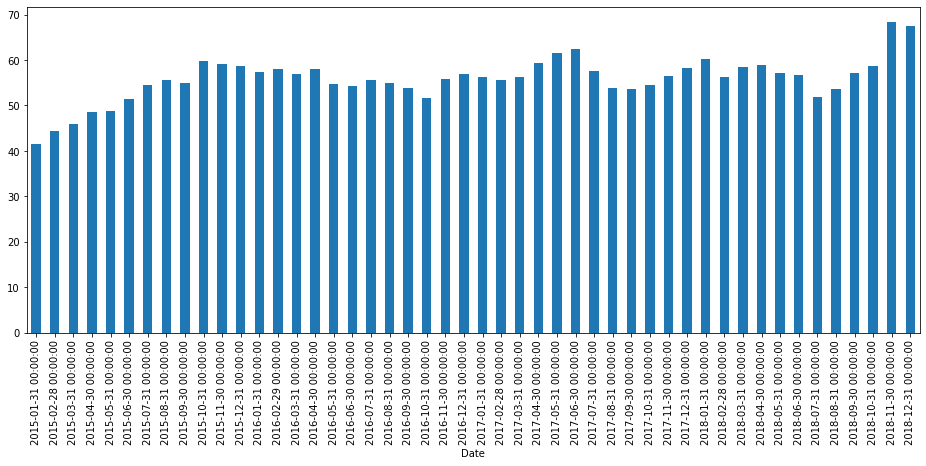

In [65]:
df['Close'].resample('M').max().plot.bar(figsize=(16,6))

In [66]:
#Time Shifting

In [68]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [69]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [70]:
#Forward shitf()

In [77]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [72]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [74]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [75]:
#Rolling & Expanding

In [78]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


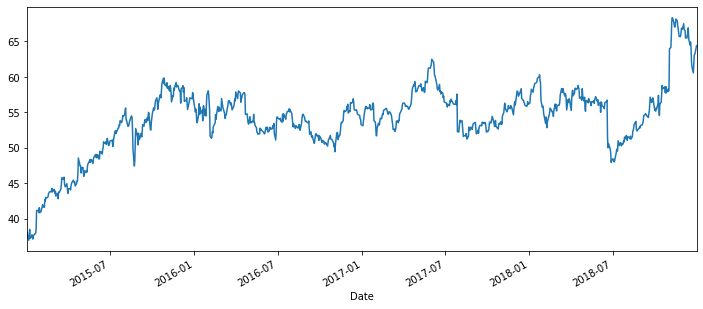

In [84]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x', tight=True)

In [85]:
#Rolling mean

In [89]:
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


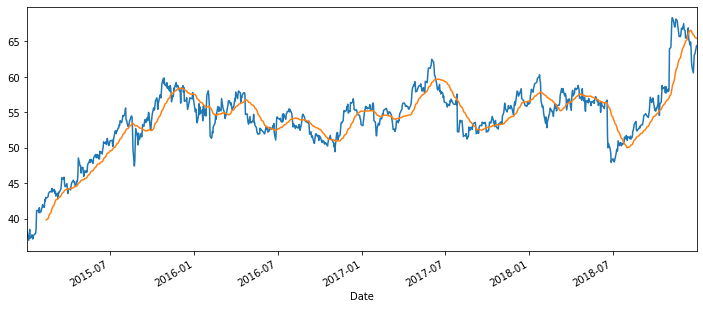

In [91]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x', tight=True)
df.rolling(window=30).mean()['Close'].plot()


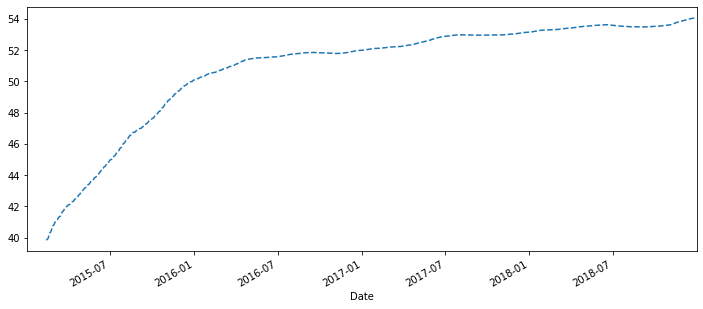

In [93]:
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5), ls='--')

In [103]:
df = pd.read_csv('monthly_milk_production.csv', encoding='utf8', index_col='Date', parse_dates=True)

In [104]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [99]:
df.dtypes

Date          object
Production     int64
dtype: object

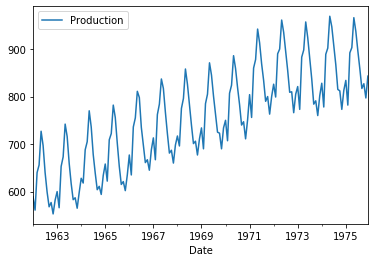

In [105]:
df.plot()

In [106]:
df['Month'] = df.index.month

In [107]:
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [110]:
df['Month2'] = df.index.strftime('%B')

In [115]:
df

,Production,Month,Month2
Date,,,
1962-01-01,589,1,January
1962-02-01,561,2,February
1962-03-01,640,3,March
1962-04-01,656,4,April
1962-05-01,727,5,May
1962-06-01,697,6,June
1962-07-01,640,7,July
1962-08-01,599,8,August
1962-09-01,568,9,September


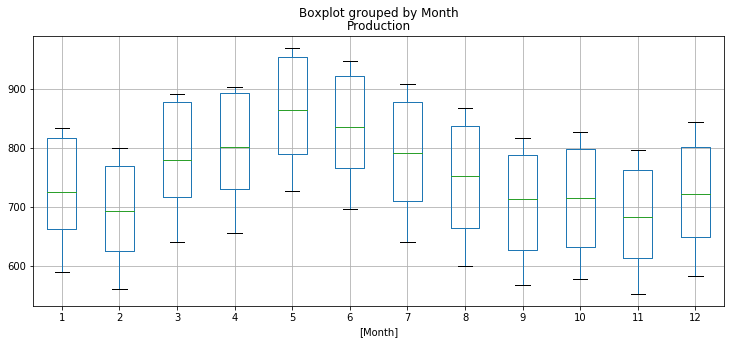

In [114]:
df.boxplot(by='Month', figsize=(12,5))